In [1]:
from keras import models
from keras.layers import Dense ,Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from IPython.display import SVG
from keras.utils import model_to_dot
from keras.utils import plot_model
import numpy as np

# mnist - its a dataset of handwrite numbres fro 0 to 9

In [2]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# livelosspolt - used to visualiztion the live training model,like how error is decre and accuracy incres

In [3]:
# pip install livelossplot


In [4]:
def data_summary(x_train,y_train,x_test,y_test):
    """Summarize current state of dataset"""
    print("Train images shape : " , x_train.shape)
    print("Train labels shape : " , y_train.shape)
    print("Test images shape : " , x_test.shape)
    print("Test labels shape : " , y_test.shape)
    print("Train labels : " , y_train)
    print("Test labels : " , y_test)

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

data_summary(x_train,y_train,x_test,y_test)

Train images shape :  (60000, 28, 28)
Train labels shape :  (60000,)
Test images shape :  (10000, 28, 28)
Test labels shape :  (10000,)
Train labels :  [5 0 4 ... 5 6 8]
Test labels :  [7 2 1 ... 4 5 6]


Train images shape :  (60000, 28, 28) - 60000 is enries in traing set and 28,28 i sthe shape
Train labels shape :  (60000,)  
Test images shape :  (10000, 28, 28)  
Test labels shape :  (10000,)  
Train labels :  [5 0 4 ... 5 6 8]  
Test labels :  [7 2 1 ... 4 5 6]  

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
# reshape the data
x_train = x_train.reshape((x_train.shape[0],NUM_ROWS * NUM_COLS))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0],NUM_ROWS * NUM_COLS))
x_test = x_test.astype('float32') / 255

In [8]:
# categorically encode labesl
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

In [9]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
data_summary(x_train,y_train,x_test,y_test)

Train images shape :  (60000, 784)
Train labels shape :  (60000, 10)
Test images shape :  (10000, 784)
Test labels shape :  (10000, 10)
Train labels :  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels :  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
model = models.Sequential()
model.add(Dense(512 , activation='relu' , input_shape = (NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256 , activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10 , activation = 'softmax'))

# 512 is the nodes

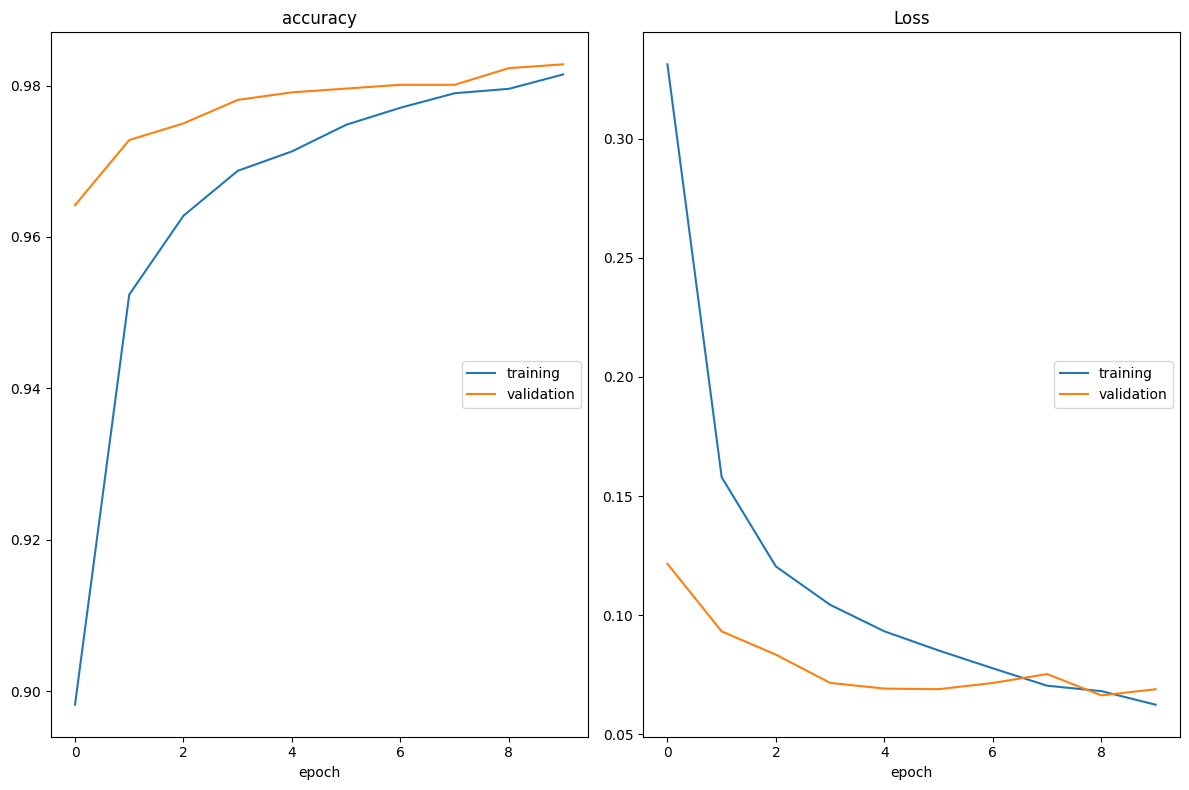

accuracy
	training         	 (min:    0.898, max:    0.981, cur:    0.981)
	validation       	 (min:    0.964, max:    0.983, cur:    0.983)
Loss
	training         	 (min:    0.062, max:    0.331, cur:    0.062)
	validation       	 (min:    0.066, max:    0.122, cur:    0.069)
469/469 [==============================] - 8s 18ms/step - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.0689 - val_accuracy: 0.9828


In [12]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         callbacks=[plot_losses],
         verbose=1,
         validation_data=(x_test,y_test))

In [13]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss : ',score[0])
print('Test accuracy : ',score[1])

Test loss :  0.06894233077764511
Test accuracy :  0.9828000068664551


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# pip install pydot

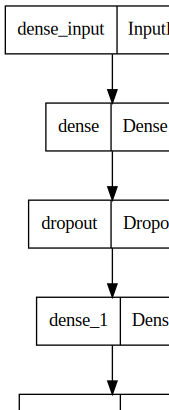

In [16]:
SVG(model_to_dot(model).create(prog='dot',format='svg'))

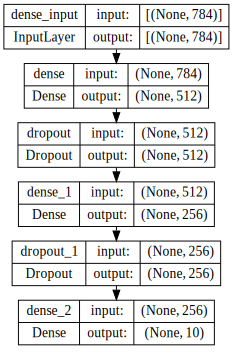

In [27]:
dot = model_to_dot(model, show_shapes=True, show_layer_names=True)

# Adjust the layout, spacing, and size attributes
dot.set('rankdir', 'TB')       # Set the rank direction to top to bottom
dot.set('ranksep', '0.2')      # Adjust the vertical spacing between ranks
dot.set('nodesep', '0.1')      # Adjust the horizontal spacing between nodes
dot.set('dpi', '70')           # Adjust the overall DPI for size control

# Render the dot file to an SVG image (requires Graphviz software)
svg = dot.create(format='svg')

# Display the modified SVG
SVG(svg)

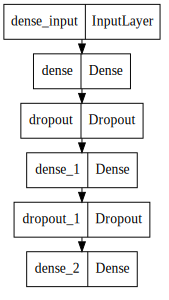

In [26]:
dot = model_to_dot(model)

# Adjust the layout, spacing, and size attributes
dot.set('rankdir', 'TB')       # Set the rank direction to top to bottom
dot.set('ranksep', '0.2')      # Adjust the vertical spacing between ranks
dot.set('nodesep', '0.1')      # Adjust the horizontal spacing between nodes
dot.set('dpi', '70')           # Adjust the overall DPI for size control

# Render the dot file to an SVG image (requires Graphviz software)
svg = dot.create(format='svg')

# Display the modified SVG
SVG(svg)